# Exploring the senegalese tax-benefit-system with OpenFisca

In [1]:
import matplotlib.pyplot as plt  # For graphics
%matplotlib inline

from openfisca_core import periods
from openfisca_senegal import SenegalTaxBenefitSystem  # The Senegalese tax-benefits system

## The concepts

### Tax Benefit System

In [2]:
tax_benefit_system = SenegalTaxBenefitSystem()

### Entities

In [3]:
tax_benefit_system.entities

[openfisca_core.entities.Famille, openfisca_core.entities.Individu]

### Variables 

In [4]:
tax_benefit_system.variables

{u'benefices_non_salarie': <140371090482768_model.benefices_non_salarie at 0x7faac938ac50>,
 u'conjoint_a_des_revenus': <140371090482768_model.conjoint_a_des_revenus at 0x7faab0fc2c90>,
 u'date_de_naissance': <140371090482768_model.date_de_naissance at 0x7faab0fc28d0>,
 u'est_celibataire': <140371090482768_model.est_celibataire at 0x7faab0fcc310>,
 u'est_divorce': <140371090482768_model.est_divorce at 0x7faa98592d90>,
 u'est_marie': <140371090482768_model.est_marie at 0x7faab0fcc390>,
 u'est_veuf': <140371090482768_model.est_veuf at 0x7faab0fcc3d0>,
 u'impot_avant_reduction_famille': <140371090482768_model.impot_avant_reduction_famille at 0x7faab0fcc410>,
 u'impot_revenus': <140371090482768_model.impot_revenus at 0x7faab0fcc450>,
 u'nombre_de_parts': <140371090482768_model.nombre_de_parts at 0x7faab0fcc490>,
 u'nombre_enfants': <140371090482768_model.nombre_enfants at 0x7faab0fcc510>,
 u'pension_retraite': <140371090482768_model.pension_retraite at 0x7faa9829a9d0>,
 u'reduction_impots_

In [5]:
sorted(tax_benefit_system.variables.keys())

[u'benefices_non_salarie',
 u'conjoint_a_des_revenus',
 u'date_de_naissance',
 u'est_celibataire',
 u'est_divorce',
 u'est_marie',
 u'est_veuf',
 u'impot_avant_reduction_famille',
 u'impot_revenus',
 u'nombre_de_parts',
 u'nombre_enfants',
 u'pension_retraite',
 u'reduction_impots_pour_charge_famille',
 u'salaire']

In [6]:
import inspect
for name, variable in sorted(tax_benefit_system.variables.iteritems()):
    print name
    if not variable.is_input_variable():
        formula = variable.get_formula('2017')
        source_code = inspect.getsourcelines(formula)[0]
        print ''.join(source_code)
    print ''

benefices_non_salarie

conjoint_a_des_revenus

date_de_naissance

est_celibataire

est_divorce

est_marie

est_veuf

impot_avant_reduction_famille
    def formula(individu, period, legislation):
        salaire = individu('salaire', period, options = [ADD])
        salaire_abattement = min_(0.3 * salaire, 900000)
        salaire_imposable = salaire - salaire_abattement

        pension_retraite = individu('pension_retraite', period, options = [ADD])
        pension_abbattement = max_(pension_retraite * 0.4, 1800000) * (pension_retraite > 0)
        retraite_imposable = pension_retraite - pension_abbattement
        benefices_non_salarie = individu('benefices_non_salarie', period, options = [ADD])
        benefice_abattement = benefices_non_salarie * 0.15
        benefices_imposable = benefices_non_salarie - benefice_abattement

        revenus_arrondis = floor_divide(salaire_imposable + retraite_imposable + benefices_imposable, 1000) * 1000
        revenus_imposable = max_(0, revenus_a

### Parameters

In [7]:
print tax_benefit_system.parameters

bareme_impot_progressif:
  - threshold:
      2013-01-01: 0.0
    rate:
      2013-01-01: 0.0
  - threshold:
      2013-01-01: 630000.0
    rate:
      2013-01-01: 0.2
  - threshold:
      2013-01-01: 1500000.0
    rate:
      2013-01-01: 0.3
  - threshold:
      2013-01-01: 4000000.0
    rate:
      2013-01-01: 0.35
  - threshold:
      2013-01-01: 8000000.0
    rate:
      2013-01-01: 0.37
  - threshold:
      2013-01-01: 13500000.0
    rate:
      2013-01-01: 0.4
reductions_pour_charge_de_famille:
  taux_9:
    2013-01-01: 0.45
  taux_8:
    2013-01-01: 0.4
  taux_1:
    2013-01-01: 0.0
  taux_3:
    2013-01-01: 0.15
  taux_2:
    2013-01-01: 0.1
  taux_5:
    2013-01-01: 0.25
  taux_4:
    2013-01-01: 0.2
  taux_7:
    2013-01-01: 0.35
  taux_6:
    2013-01-01: 0.3
  min_8:
    2013-01-01: 700000.0
  min_9:
    2013-01-01: 800000.0
  min_4:
    2013-01-01: 300000.0
  min_5:
    2013-01-01: 400000.0
  min_6:
    2013-01-01: 500000.0
  min_7:
    2013-01-01: 600000.0
  min_1:
    201

In [8]:
print tax_benefit_system.parameters(2017).bareme_impot_progressif

  - threshold: 0.0
    rate: 0.0
  - threshold: 630000.0
    rate: 0.2
  - threshold: 1500000.0
    rate: 0.3
  - threshold: 4000000.0
    rate: 0.35
  - threshold: 8000000.0
    rate: 0.37
  - threshold: 13500000.0
    rate: 0.4


## A simple test case scenario

### Basics

In [9]:
scenario = tax_benefit_system.new_scenario().init_single_entity(
    parent1 = {
        'salaire': 2800000,
        'est_marie': True,
        'conjoint_a_des_revenus': False,
        'nombre_enfants': 1,
        },
    period = '2017',
    )


In [10]:
simulation = scenario.new_simulation()

In [11]:
simulation.calculate('salaire', period = '2017')

array([2800000.], dtype=float32)

In [12]:
simulation.calculate('impot_revenus', period = '2017')

array([11700.], dtype=float32)

### Application: a simple function to compute the tax gain for having a child

In [13]:
def tax_gain(salaire = 0, est_marie = False, conjoint_a_des_revenus = False, nombre_enfants = 0):
    period = '2017'
    parent1_before = {
        'salaire': salaire,
        'est_marie': est_marie,
        'conjoint_a_des_revenus': conjoint_a_des_revenus,
        'nombre_enfants': nombre_enfants,
        }
    simulation_before = tax_benefit_system.new_scenario().init_single_entity(
        parent1 = parent1_before,
        period = period,
        ).new_simulation()
    parent1_after = parent1_before.copy()
    parent1_after['nombre_enfants'] += 1
    simulation_after = tax_benefit_system.new_scenario().init_single_entity(
        parent1 = parent1_after,
        period = period,
        ).new_simulation()
    difference = simulation_after.calculate('impot_revenus', period) - simulation_before.calculate('impot_revenus', period)
    return -difference
                                                                                            

In [14]:
tax_gain(2800000)

array([100000.], dtype=float32)

In [15]:
tax_gain(salaire = 2800000, nombre_enfants = 3)

array([11700.], dtype=float32)

In [16]:
[tax_gain(salaire = 2800000, nombre_enfants = n) for n in range(8)]

[array([100000.], dtype=float32),
 array([100000.], dtype=float32),
 array([100000.], dtype=float32),
 array([11700.], dtype=float32),
 array([-0.], dtype=float32),
 array([-0.], dtype=float32),
 array([-0.], dtype=float32),
 array([-0.], dtype=float32)]

## More complex scenario: varying revenue 

### Basics

In [17]:
year = 2017
simulation = tax_benefit_system.new_scenario().init_single_entity(
    parent1 = {
        'est_marie': True,
        'conjoint_a_des_revenus': False,
        'nombre_enfants': 0,
        },
    period = year,
    axes = [
        {
            'count': 100,
            'min': 0,
            'max': 15e6,
            'name': 'salaire',
            }
        ],
    ).new_simulation()

salaire = simulation.individu('salaire', period = year)
reduction_impots_pour_charge_famille = simulation.individu('reduction_impots_pour_charge_famille', period = year)
impot_avant_reduction_famille = simulation.individu('impot_avant_reduction_famille', period = year)
impot_revenus = simulation.individu('impot_revenus', period = year)

Text(0.5,1,u'0 enfants')

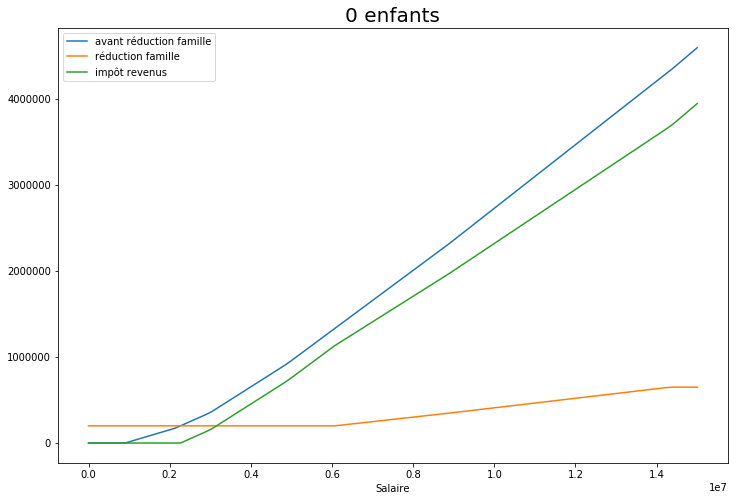

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(salaire, impot_avant_reduction_famille, label=u'avant réduction famille')
plt.plot(salaire, reduction_impots_pour_charge_famille, label=u'réduction famille')
plt.plot(salaire, impot_revenus, label=u'impôt revenus')
plt.xlabel(u'Salaire')
plt.legend()
plt.title(u'0 enfants', fontsize=20)

### Application: by how much the tax gain for having a child varies with revenue

In [19]:
def tax_gain_varying_revenue(max_salaire = 0, est_marie = False, conjoint_a_des_revenus = False, 
                             nombre_enfants = 0, count = 100):
    period = '2017'
    parent1_before = {
        'est_marie': est_marie,
        'conjoint_a_des_revenus': conjoint_a_des_revenus,
        'nombre_enfants': nombre_enfants,
        }
    axes = [
            {
                'count': count,
                'min': 0,
                'max': max_salaire,
                'name': 'salaire',
                }
            ]
    simulation_before = tax_benefit_system.new_scenario().init_single_entity(
        parent1 = parent1_before,
        axes = axes,
        period = period,
        ).new_simulation()
    parent1_after = parent1_before.copy()
    parent1_after['nombre_enfants'] += 1
    simulation_after = tax_benefit_system.new_scenario().init_single_entity(
        parent1 = parent1_after,
        axes = axes,
        period = period,
        ).new_simulation()
    difference = simulation_after.calculate('impot_revenus', period) - simulation_before.calculate('impot_revenus', period)
    salaire = simulation_after.calculate('salaire', period)
    return salaire, -difference
    

In [20]:
salaire, gain = tax_gain_varying_revenue(max_salaire=15e6, count = 1000)

Text(0.5,1,u'Gain fiscal au 1er enfant')

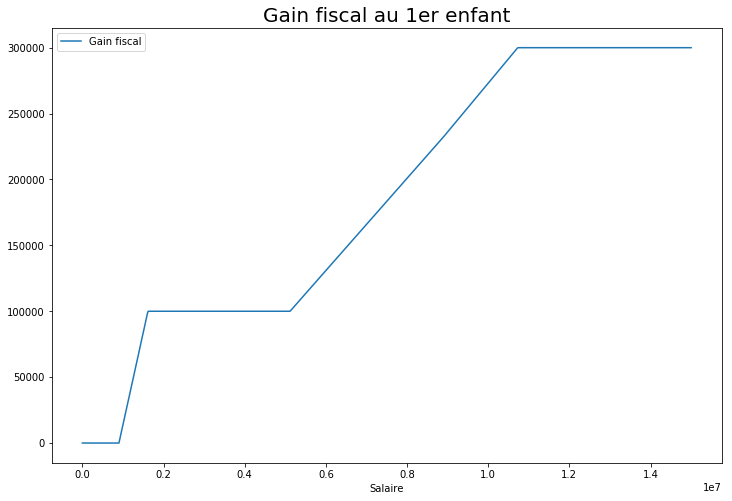

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(salaire, gain, label=u'Gain fiscal')
plt.xlabel(u'Salaire')
plt.legend()
plt.title(u'Gain fiscal au 1er enfant', fontsize=20)

#### Exercice: Write a loop to plot the gain for several children

Text(0.5,1,u"Gain fiscal selon le rang de l'enfant")

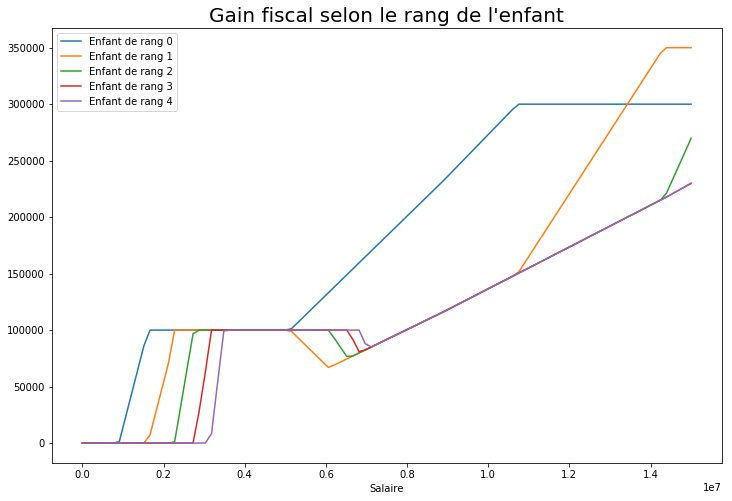

In [22]:
plt.figure(figsize=(12, 8))
for nombre_enfants in range(5):
    salaire, gain = tax_gain_varying_revenue(max_salaire=15e6, nombre_enfants = nombre_enfants)
    plt.plot(salaire, gain, label=u"Enfant de rang {}".format(nombre_enfants))

plt.xlabel(u'Salaire')
plt.legend()
plt.title(u"Gain fiscal selon le rang de l'enfant", fontsize=20)


## Tax rates

### Average tax rate

In [23]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    parent1 = {
        'est_marie': False,
        'conjoint_a_des_revenus': False,
        'nombre_enfants': 0,
        },
    period = year,
    axes = [
        {
            'count': 100,
            'min': 0,
            'max': 18e6,
            'name': 'salaire',
            }
        ],
    ).new_simulation()
salaire = simulation.calculate('salaire', period = year)
impot = simulation.calculate('impot_revenus', period = year)

Text(0.5,0,u'Salaire')

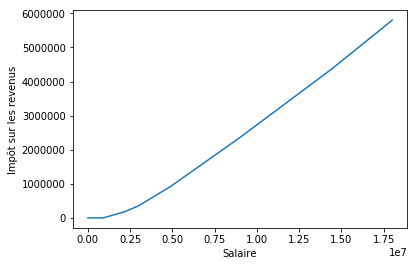

In [24]:
plt.plot(salaire, impot)
plt.ylabel(u"Impôt sur les revenus")
plt.xlabel(u"Salaire")

In [25]:
taux_moyen = impot / salaire  # Average tax rate

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


In [26]:
taux_moyen = impot / (salaire * (salaire != 0) + 1.0 * (salaire == 0) )  

Text(0.5,0,u'Salaire')

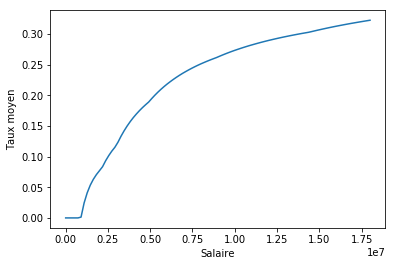

In [27]:
plt.plot(salaire, taux_moyen)
plt.ylabel("Taux moyen")
plt.xlabel("Salaire")

### Marginal tax rate

In [28]:
(impot - impot[1:]) / (salaire - salaire[1:])

ValueError: operands could not be broadcast together with shapes (100,) (99,) 

In [29]:
taux_marginal =  (impot[:-1] - impot[1:]) / (salaire[:-1] - salaire[1:] )  # We avoid the first point

In [30]:
len(taux_marginal)

99

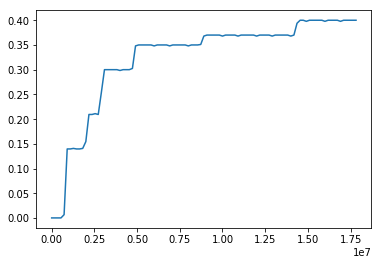

In [31]:
plt.plot(salaire[:-1], taux_marginal)

#### Exercice: how marginal and average tax rate compare at infinity

### Add a new variable and use dedicated functions

Add a disposable income variable to the tax-benefit-system

In [32]:
from openfisca_core.model_api import *
from openfisca_senegal.entities import Individu

tax_benefit_system = SenegalTaxBenefitSystem()

class revenu_disponible(Variable):
    definition_period = YEAR
    entity = Individu
    value_type = float

    def formula(individu, period):
        salaire = individu('salaire', period)
        pension_retraite = individu('pension_retraite', period)
        impot_revenus = individu('impot_revenus', period)
        return salaire + pension_retraite - impot_revenus


tax_benefit_system.add_variable(revenu_disponible)

In [33]:
sorted(tax_benefit_system.variables.keys())

[u'benefices_non_salarie',
 u'conjoint_a_des_revenus',
 u'date_de_naissance',
 u'est_celibataire',
 u'est_divorce',
 u'est_marie',
 u'est_veuf',
 u'impot_avant_reduction_famille',
 u'impot_revenus',
 u'nombre_de_parts',
 u'nombre_enfants',
 u'pension_retraite',
 u'reduction_impots_pour_charge_famille',
 u'revenu_disponible',
 u'salaire']

In [34]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    parent1 = {
        'est_marie': True,
        'conjoint_a_des_revenus': False,
        'nombre_enfants': 0,
        },
    period = '2017',
    axes = [
        {
            'count': 1000,
            'min': 0,
            'max': 50e6,
            'name': 'salaire',
            }
        ],
    ).new_simulation()
salaire = simulation.calculate('salaire', period = year)
impot_revenus = simulation.calculate('impot_revenus', period = year)
revenu_disponible = simulation.calculate('revenu_disponible', period = year)

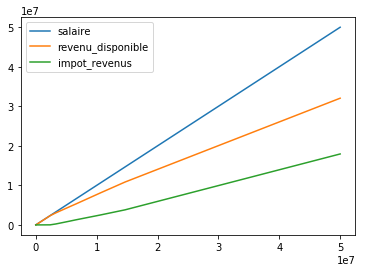

In [35]:
plt.plot(salaire, salaire, label = 'salaire')
plt.plot(salaire, revenu_disponible, label = 'revenu_disponible')
plt.plot(salaire, impot_revenus, label = 'impot_revenus')
plt.legend()

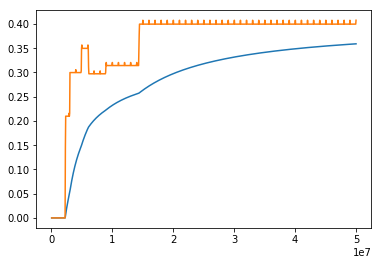

In [36]:
from openfisca_core.rates import average_rate, marginal_rate
plt.plot(salaire[1:], average_rate(revenu_disponible[1:], salaire[1:]))
plt.plot(salaire[1:], marginal_rate(revenu_disponible, salaire))

## Reforming the tax-benefit system

### Parametric reform

In [37]:
parameters = tax_benefit_system.parameters


In [38]:
threshold = parameters.bareme_impot_progressif[1].threshold

In [39]:
threshold.update()

ValueError: You must provide either a start or a period

In [40]:
print year
def f(parameters):
    parameters.bareme_impot_progressif[5].rate.update(period = period(year), value = .5)
    return parameters
    
class tax_the_rich(Reform):
    name = u"Tax last bracket at 50%"

    def apply(self):
        self.modify_parameters(modifier_function = f)

2017


In [41]:
reformed_tax_benefit_system = tax_the_rich(tax_benefit_system)

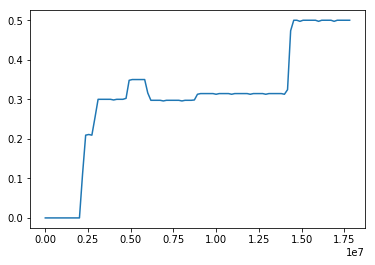

In [42]:
simulation = reformed_tax_benefit_system.new_scenario().init_single_entity(
    parent1 = {
        'est_marie': True,
        'conjoint_a_des_revenus': False,
        'nombre_enfants': 0,
        },
    period = year,
    axes = [
        {
            'count': 100,
            'min': 0,
            'max': 18e6,
            'name': 'salaire',
            }

    ],
    ).new_simulation()
salaire = simulation.calculate('salaire', period = year)
impot = simulation.calculate('impot_revenus', period = year)
taux_marginal =  (impot[:-1] - impot[1:]) / (salaire[:-1] - salaire[1:] )  # We avoid the first point
plt.plot(salaire[:-1], taux_marginal)

### Structural Reform

#### Exercice: add a an amount threshold under which no tax is due

In [43]:
seuil = 10000
tax_benefit_system = SenegalTaxBenefitSystem()
    
class impot_revenus(Variable):
    def formula(individu, period):
        impot_avant_reduction_famille = individu('impot_avant_reduction_famille', period)
        reduction_impots_pour_charge_famille = individu('reduction_impots_pour_charge_famille', period)
        impot_apres_reduction_famille = impot_avant_reduction_famille - reduction_impots_pour_charge_famille
        impot_revenus = max_(0, impot_apres_reduction_famille)
        return impot_revenus * (impot_revenus > seuil)            

class revenu_disponible(Variable):
    definition_period = YEAR
    entity = Individu
    value_type = float

    def formula(individu, period):
        salaire = individu('salaire', period)
        impot_revenus = individu('impot_revenus', period)
        return salaire - impot_revenus

class structural_reform(Reform):
    name = u"Seuil de non-versement: {}".format(seuil)

    def apply(self):
        self.update_variable(impot_revenus)
        self.add_variable(revenu_disponible)

structurally_reformed_tax_benefit_system = structural_reform(tax_benefit_system)

In [44]:
def build_structural_reform(seuil = 10000):    
    tax_benefit_system = SenegalTaxBenefitSystem()
    
    class impot_revenus(Variable):
        def formula(individu, period):
            impot_avant_reduction_famille = individu('impot_avant_reduction_famille', period)
            reduction_impots_pour_charge_famille = individu('reduction_impots_pour_charge_famille', period)
            impot_apres_reduction_famille = impot_avant_reduction_famille - reduction_impots_pour_charge_famille
            impot_revenus = max_(0, impot_apres_reduction_famille)
            return impot_revenus * (impot_revenus > seuil)            

    class revenu_disponible(Variable):
        definition_period = YEAR
        entity = Individu
        value_type = float

        def formula(individu, period):
            salaire = individu('salaire', period)
            impot_revenus = individu('impot_revenus', period)
            return salaire - impot_revenus

    class structural_reform(Reform):
        name = u"Seuil de non-versement: {}".format(seuil)

        def apply(self):
            self.update_variable(impot_revenus)
            self.add_variable(revenu_disponible)

    return structural_reform(tax_benefit_system)

In [45]:
structurally_reformed_tax_benefit_system = build_structural_reform(seuil = 100000)
simulation = structurally_reformed_tax_benefit_system.new_scenario().init_single_entity(
    parent1 = {
        'est_marie': True,
        'conjoint_a_des_revenus': False,
        'nombre_enfants': 0,
        },
    period = '2017',
    axes = [
        {
            'count': 100,
            'min': 0,
            'max': 5e6,
            'name': 'salaire',
            }
        ],
    ).new_simulation()
salaire = simulation.calculate('salaire', period = year)
impot_revenus = simulation.calculate('impot_revenus', period = year)
revenu_disponible = simulation.calculate('revenu_disponible', period = year)

Text(0.5,0,u'Salaire')

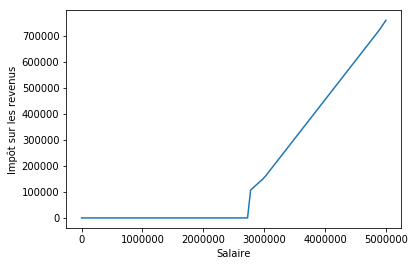

In [46]:
plt.plot(salaire, impot_revenus)
plt.ylabel(u"Impôt sur les revenus")
plt.xlabel(u"Salaire")

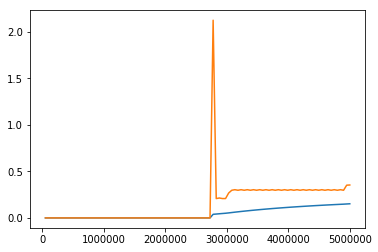

In [47]:
plt.plot(salaire[1:], average_rate(revenu_disponible[1:], salaire[1:]))
plt.plot(salaire[1:], marginal_rate(revenu_disponible, salaire))